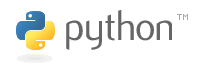

In [1]:
from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:90% !important; }</style>"))
Image('https://www.python.org/images/python-logo.gif')

## Regular Expressions

A regular expression (or 'regex') is a compact notation for representing a collection of strings. 

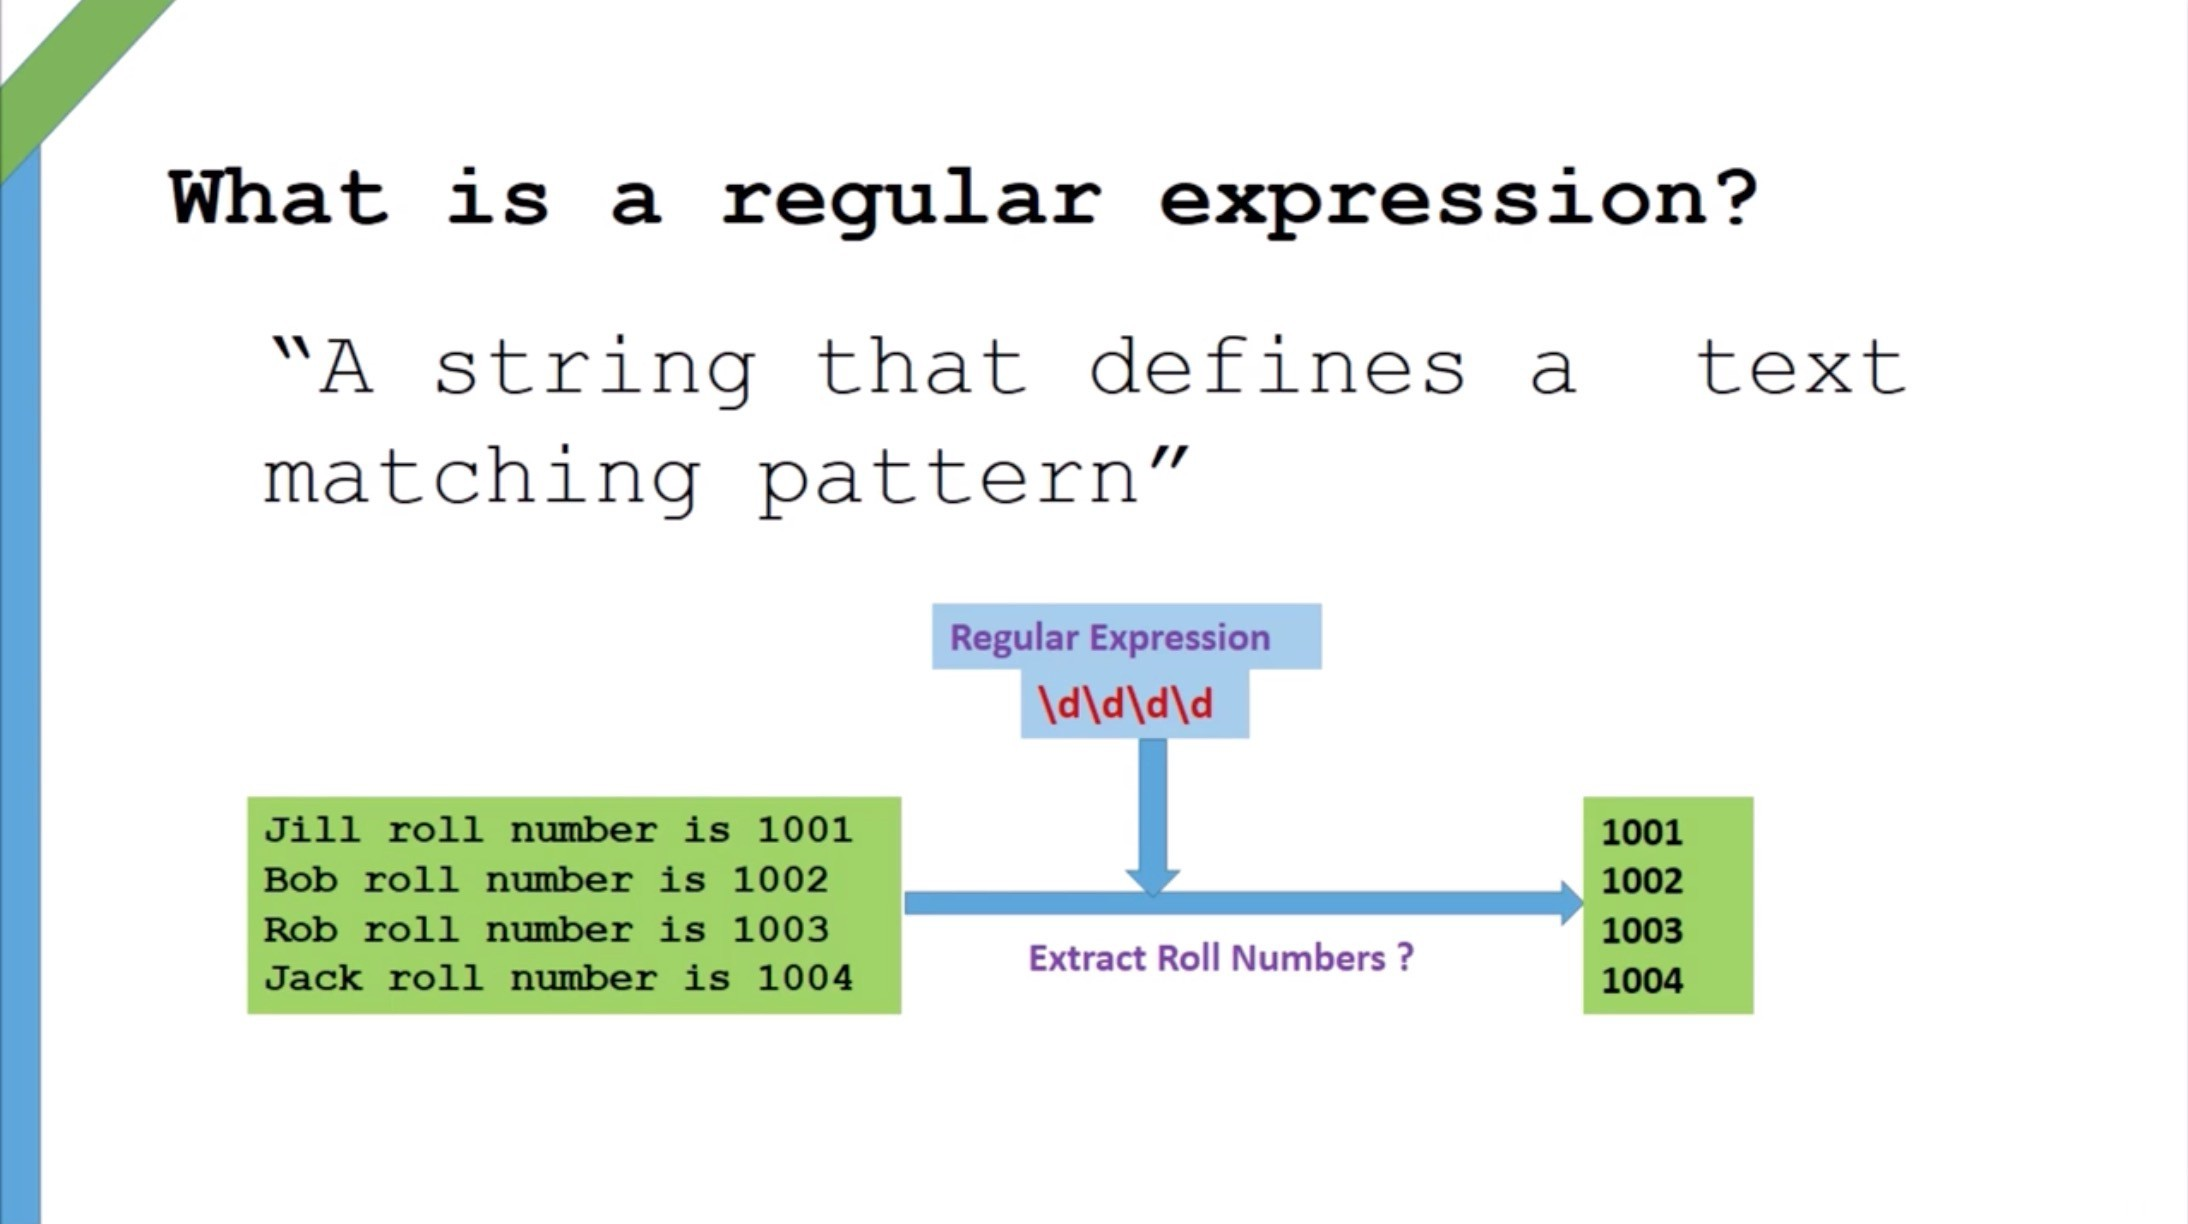

Why regular expressions?

* A single regular expression can represent multiple / unlimited number of strings which meet it's criteria.
* Provides a powerful way to search and manipulate strings.

Regular expressions are defined using a mini-language that's completely different from Python, but Python has the 're' module, which allows to create and use regexes.

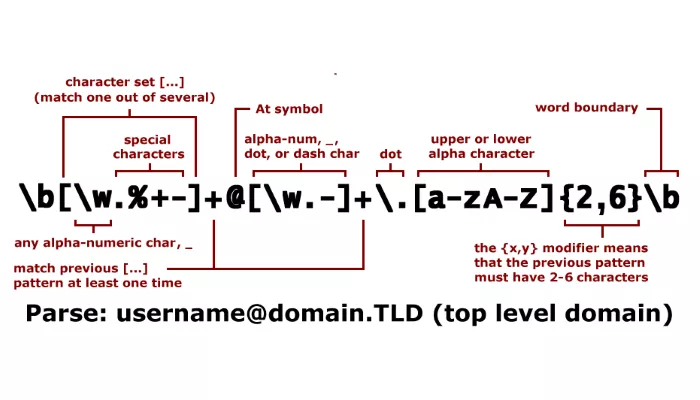

## Agenda

* Regular expressions examples
* Characters and character classes
* Quantifiers
* Grouping and capturing (advanced topic)
* Assertions and flag (advanced topic)
* The regular expression module
* Summary
* Sample Python code using regular expression
* Multiple choice questions and programming

## Regular Expressions Examples

Regexes can be used for:

* Validation: check if a piece of text meets some criteria, for example, a currency symbol followed by digits.
* Search: locate substrings that can have more than one form; for example, find any of pet.png, pet.jpg, pet.jpeg, or pet.svg while avoiding carpet.png and similar.
* Search and replace: replace everywhere the regex matches with a string; for example, in above example, find 'pet' and replace with 'cat'.
* Split strings: split a string at each place the regex matches; for example, split everywhere a colon (:) or equal sign (=) is encountered.

In simplest form, a regular expression is an expression (for instance, a literal character), optionally followed by a quantifier. More complex regexes consist of any number of quantified expressions, may include assertions, and may be influenced by flags.

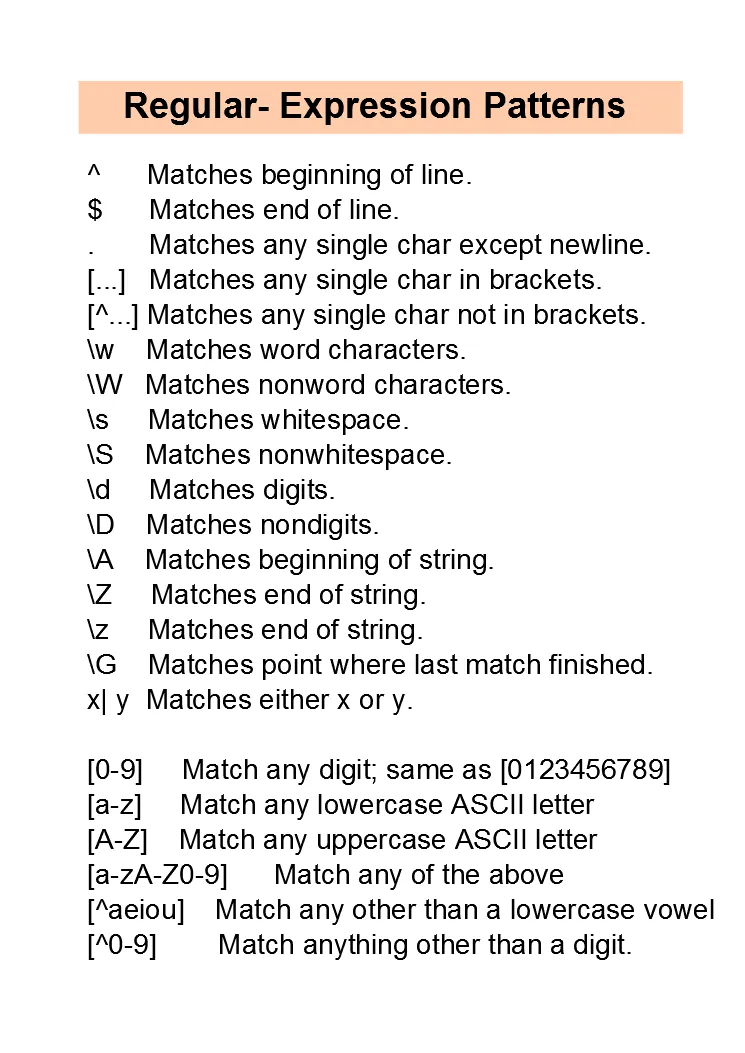

## Characters and Character Classes

### Characters

The simplest expressions are just literal characters, such as 
* a 
* 7

If no quantifier is explicitly given the expression is used to match single occurrence. 

Example, the regex 'python' consists of 6 expressions, each implicitly quantified to match once, so it matches
* one 'p' 
* followed by one 'y' 
* followed by one 't' 
* followed by one 'h'
* followed by one 'o'
* followed by one 'n'
and hence matches the strings 'python' and 'basicpython'.

Although most characters can be used as literals, some are special characters.
* symbols in the regex language must be escaped by preceding them with a backslash ( \ ) to use them as literals
* special characters are \.^$?+*{}[]()| 
* Most of Python's standard string escapes can also be used within regexes; for example, \n for newline and \t for tab, as well as hexadecimal escapes for characters using the \xHH, \uHHHH, and \UHHHHHHHH syntaxes

### Character classes

Instead of matching one particular character, character classes can be used to match any one of a set of characters.
* one or more characters enclosed in square brackets
* a character class is an expression (not to be confused by Python classes and objects) 
* if not explicitly quantified it matches exactly one character (which can be any of the characters in the character class)

Example, the regex 'r[ea]d' matches both 'red' and 'radar', but not read. 
* to match a single digit we can use the regex [0123456789]
* for convenience we can specify a range of characters using a hyphen, so the regex [0-9] also matches a digit
* to negate the meaning of a character class caret ( ^ ) is used immediately after the opening bracket, so [^0-9] matches any character that is not a digit

Inside a character class, apart from the backslash ( \ ), the special characters lose their special meaning, although the caret ( ^ ) acquires a new meaning (negation) if it's the first character in the character class, and otherwise is simply a literal caret. 

Also, the hyphen ( - ) signifies a character range unless it's the first character, in which case it's a literal hyphen.

Since some sets of characters are required so frequently, several have shorthand forms. 

With one exception, the shorthands can be used inside character sets; for example, the regex [\dA-Fa-f] matches any hexadecimal digit. The exception is the period ( . ) which is a shorthand outside a character class but matches a literal period inside a character class.

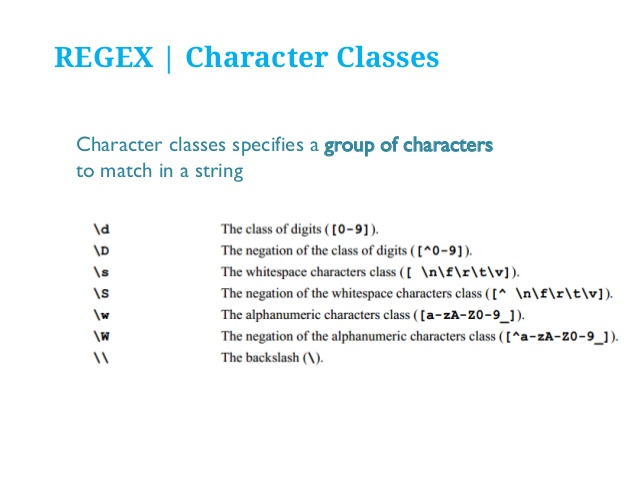

## Quantifiers

A quantifier has the form {m,n} where m and n are the minimum and maximum times the expression to which the quantifier applies must match. If only one number is given in the quantifier, it's taken to be both the minimum and the maximum.

Example
* e{1,1}e{1,1} 
* e{2,2} 
* e{1}e{1}
* e{2}

    all of these match 'feel', but neither matches 'felt'.


Example where different minimum and maximum becomes useful
* string to match travelled and traveled (both legitimate spellings)
* regex travel{1,2}ed or travell{0,1}ed can be used
* The {0,1} quantification is used so often that it has its own shorthand form, ?, so another way of writing the regex is travell?ed

Two other quantification shorthands are provided: 
* plus sign (+) stands for {1,n} ("at least one") 
* asterisk (*) stands for {0,n} ("any number of")
In both cases, 'n' is the maximum possible number allowed for a quantifier.

Often it's possible to convert * uses to + uses and vice versa. 
* example, we could match "tasselled" with at least one l using,
        
        tassell*ed or tassel+ed, 
        
  and match those with two or more l's using,
         
        tasselll*ed or tassell+ed.

By default, all quantifiers are greedy, they match as many characters as they can. 
* example, regex \d+ will match 136. 

We can make any quantifier non-greedy by following it with a question mark (?) symbol.

The question mark has two different meanings,
* on its own it's a shorthand for the {0,1} quantifier
* when it follows a quantifier it tells the quantifier to be nongreedy

Example, \d+? can match the string 136 in three different places: 1 or 3 or 6. 
Here's another example, \d?? matches zero or one digits, but prefers to match none since it's non-greedy.

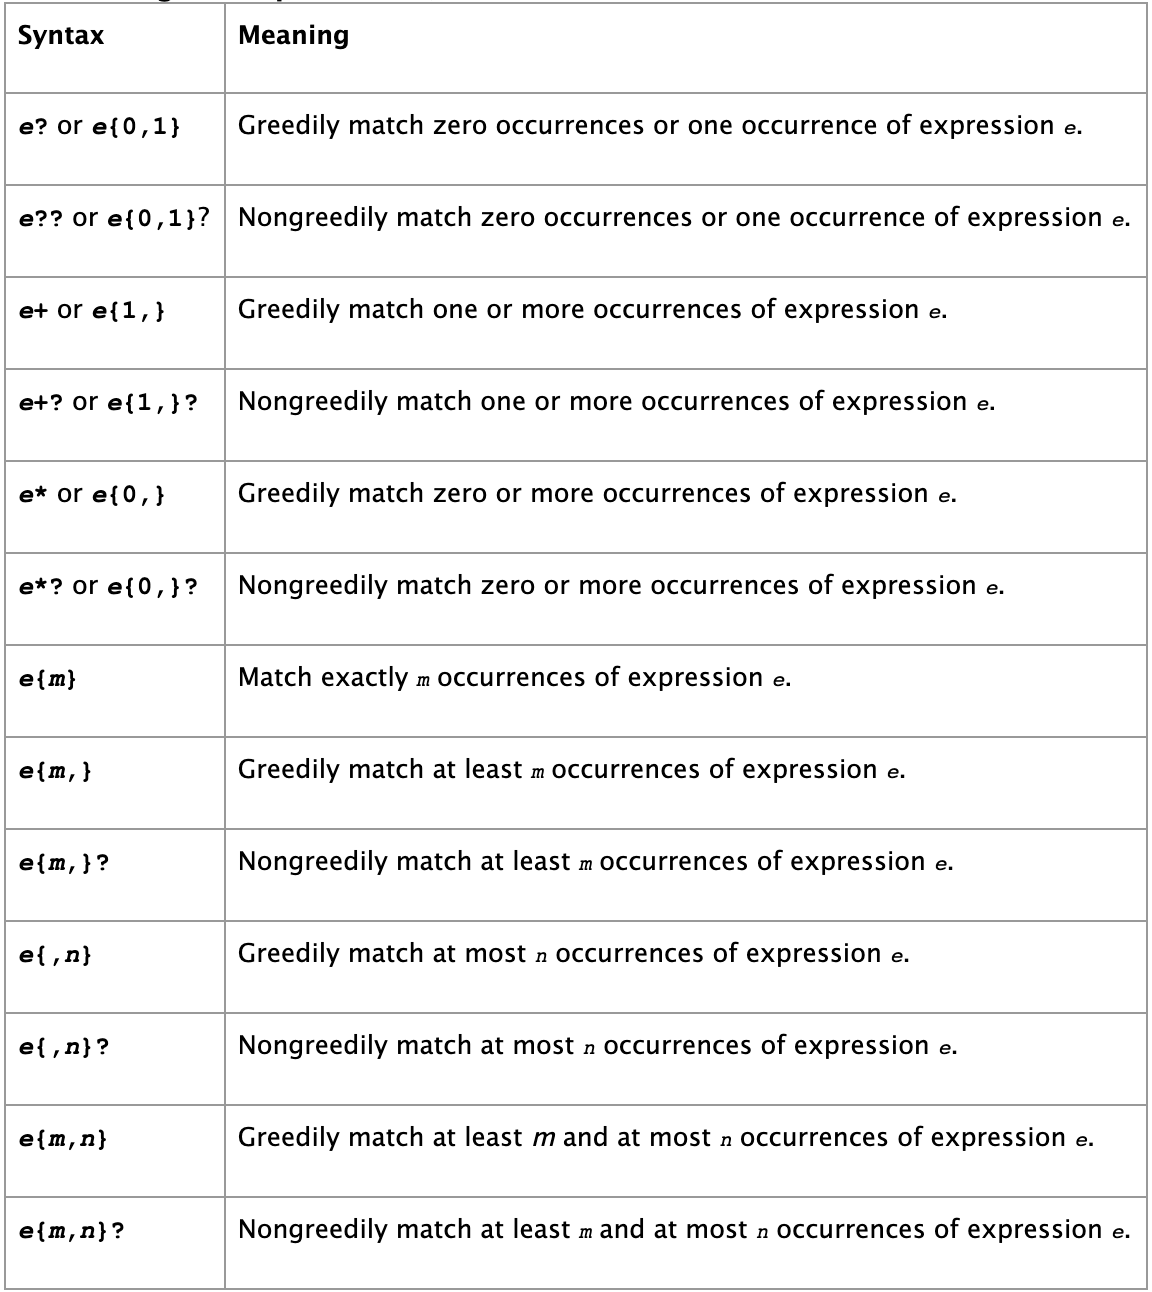

### Example use case

Non-greedy quantifiers can be useful for quick-and-dirty XML and HTML parsing. 

For example, to match all the image tags, writing <img.*> (match one each in order of <, i, m, and g, and then zero or more of any character apart from newline, and then one >) will not work because the .* part is greedy and will match everything including the tag's closing >, and will keep going until it reaches the last > in the entire text.

Three solutions present themselves (apart from using a proper parser):
* <img[^>]*> matches <img, any number of non '>' characters, and then the tag's closing > character
* <img.*?> matches <img, any number of characters (but non-greedily, so it will stop immediately before the tag's closing >), and then the >
* <img[^>]*?> combines both of the preceding options

None of these is correct, though, since they can all match 

    <img>, 
   which is not valid. 

Since we know that an image tag must have a 'src' attribute, a more accurate regex is as follows:
        
        <img\s+[^>]*?src=\w+[^>]*?>

This regex matches the literal characters <img, one or more whitespace characters, non-greedily zero or more of anything except > (to skip any other attributes such as alt), the src attribute (the literal characters src= and then at least one "word" character), and then any other non > characters (including none) to account for any other attributes, and finally the closing >.

## Grouping and Capturing

### Grouping

In practical applications, we often need regexes,
* that can match any one of two or more alternatives
* to capture the match or some part of the match for further processing 
Also, we sometimes want a quantifier to apply to several expressions. 

All of these goals can be achieved by grouping with parentheses; and, in the case of alternatives, using alternation with the vertical bar ( | ).

Alternation is especially useful when we want to match any one of several quite different alternatives. 

For example, the regex 

        aircraft|airplane|jet 
   will match any text that contains aircraft or airplane or jet. 
   
   The same objective can be achieved using the regex 
   
       air(craft|plane)|jet. 
   Here, the parentheses are used to group expressions, so we have two outer expressions, 
       
       air(craft|plane) 
       jet
   The first of these has an inner expression, craft|plane, and because this is preceded by air, the first outer expression can match only aircraft or airplane.

### Capturing

<-- Advanced topic -->

### Quantifiers in grouping and capturing

<-- Advanced topic -->

### Backreferences

<-- Advanced topic -->

## Assertions and Flag

One problem that affects many of the regexes so far is that they can match more or different text than we intended. 

For example, the regex aircraft|airplane|jet will match waterjet and jetski as well as jet. This kind of problem can be solved by using assertions. An assertion doesn't match any text, but instead says something about the text at the point where the assertion occurs.

One assertion is \b (word boundary), which asserts that the character that precedes it must be a "word" (\w) and the character that follows it must be a non-"word" (\W), or vice versa. For example, although the regex "jet" can match twice in the following text:

        the jet and jetski are noisy

while the regex \bjet\b will match only once. In the context of the original regex, we could write it this way:

        \baircraft\b|\bairplane\b|\bjet\b

that is, using word boundaries.

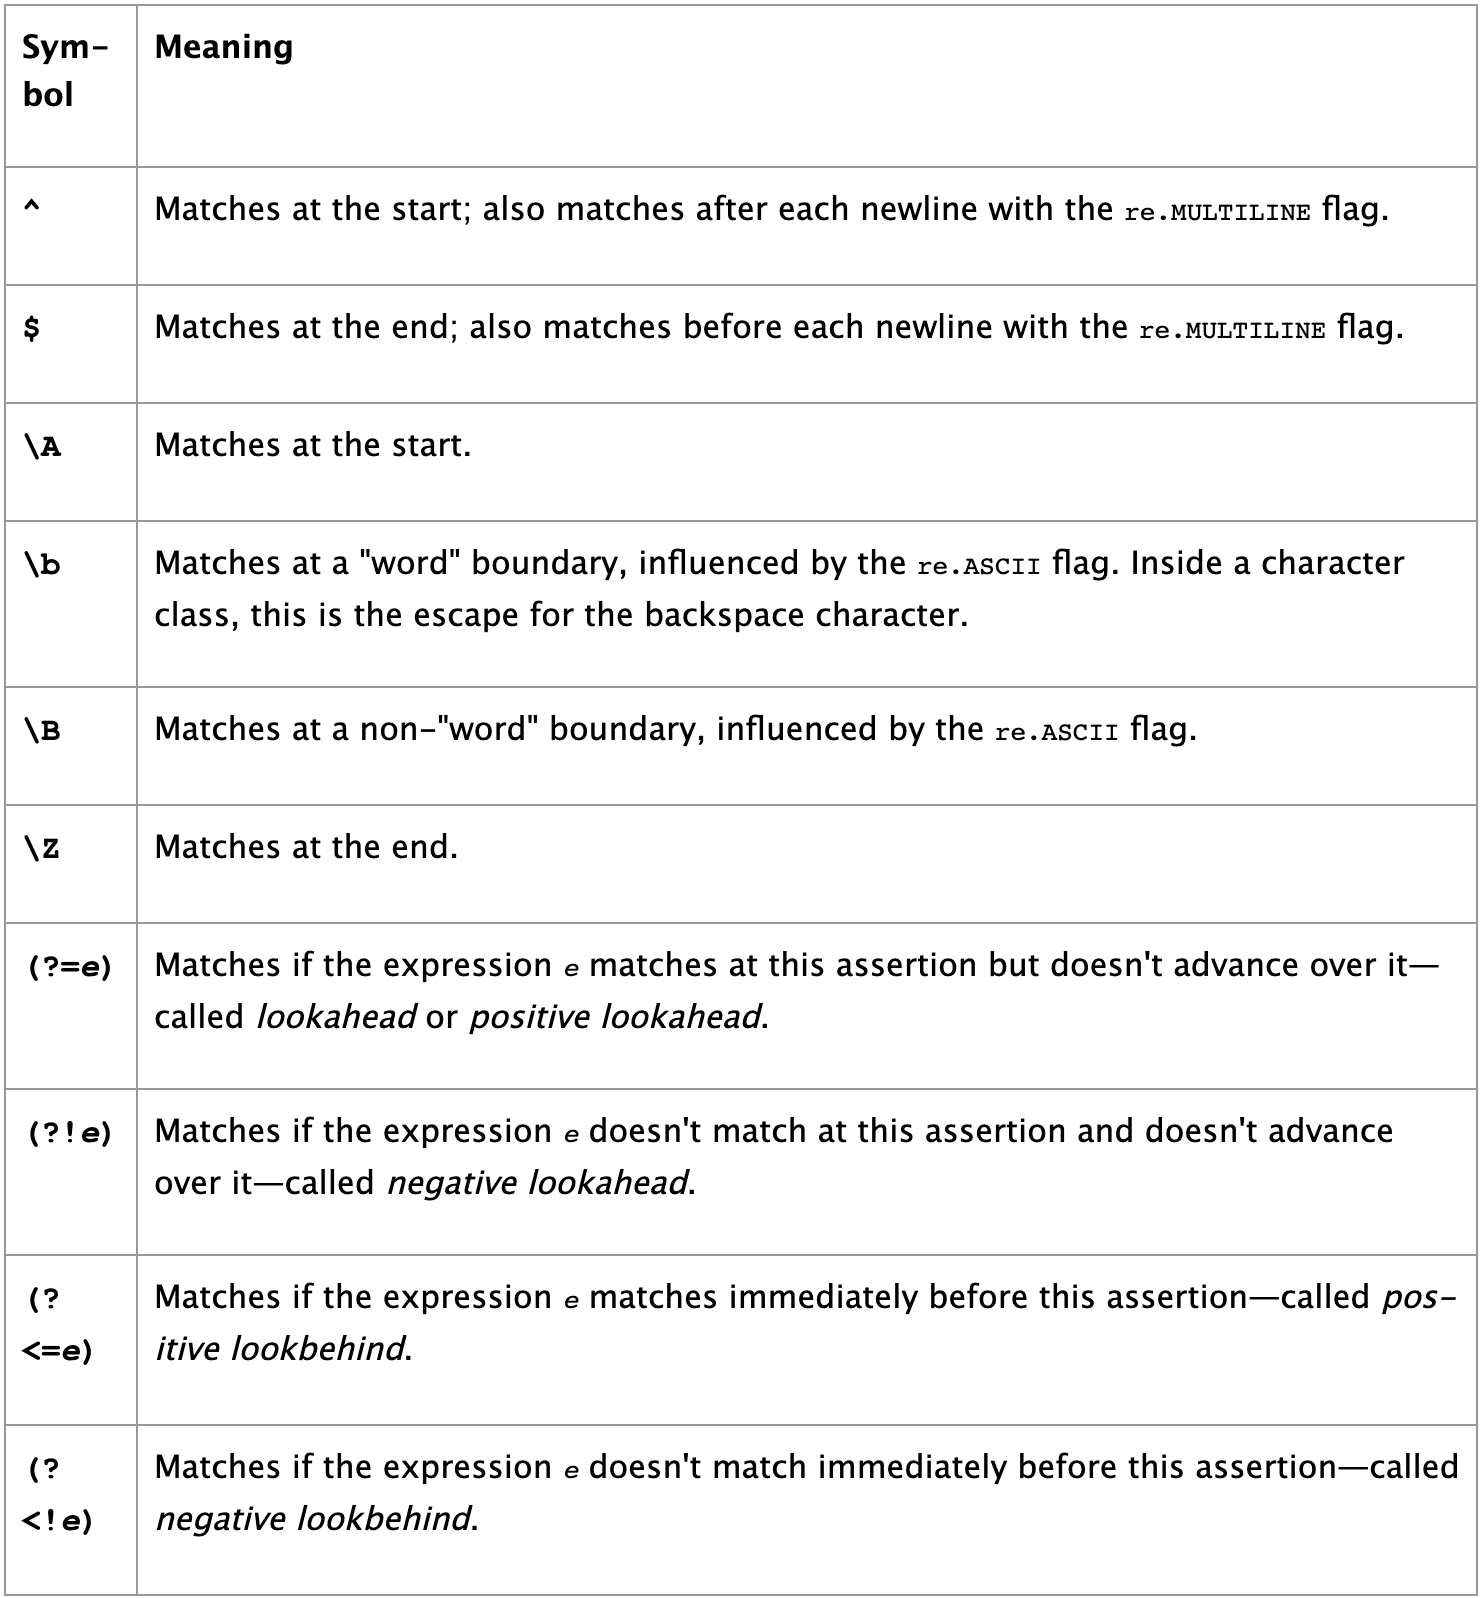

There are many more assertions but that is part of advanced topic.

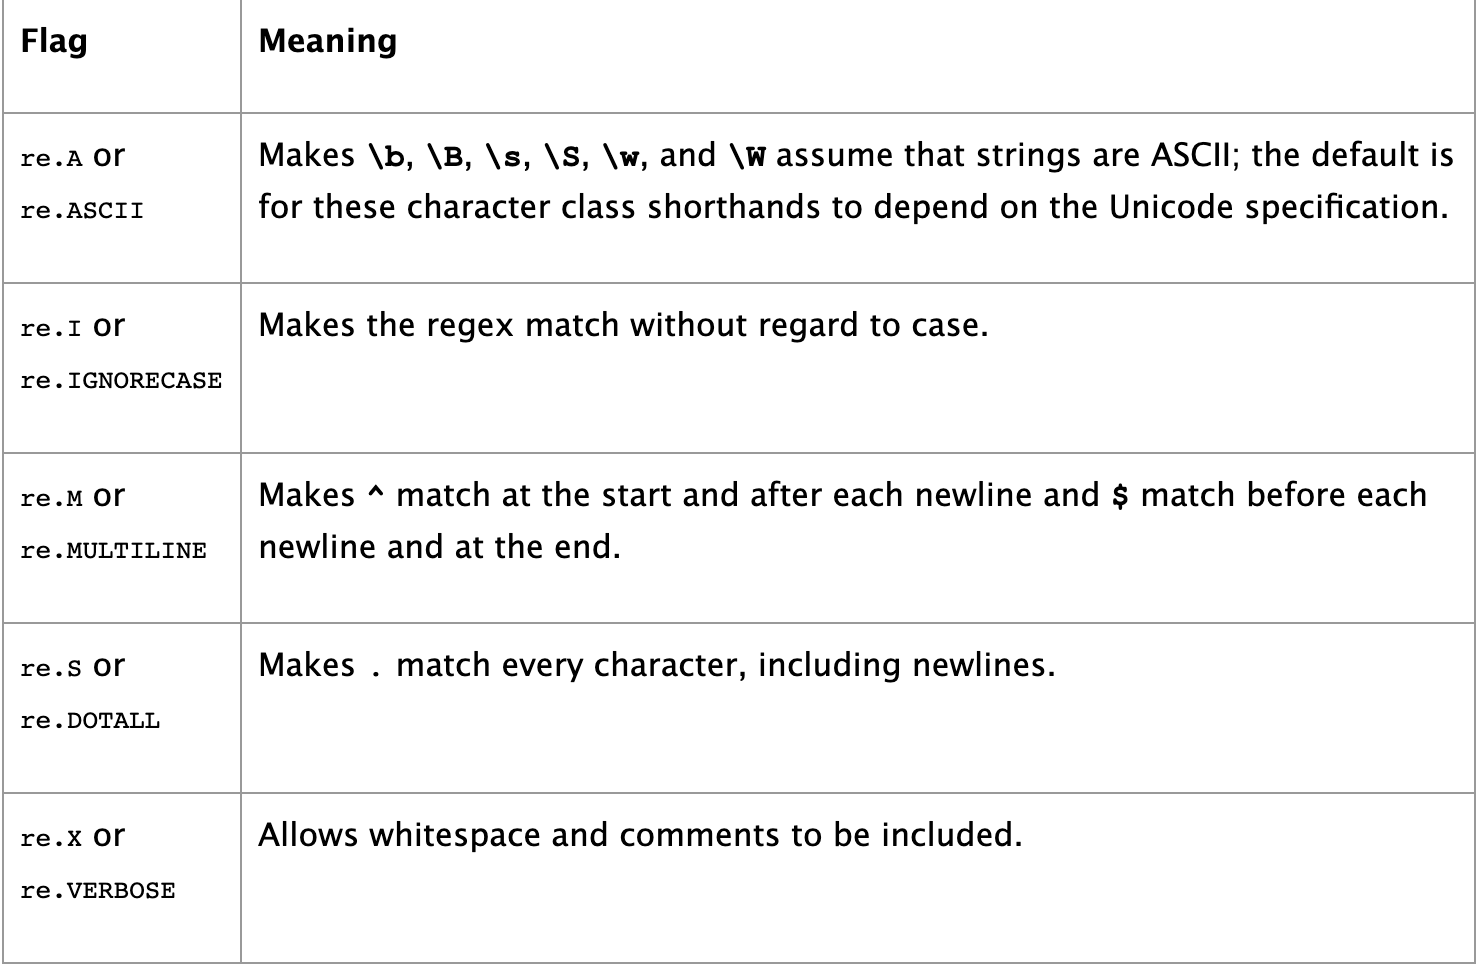

## The Regular Expression Module

The Python module 're' provides full support for Perl-like regular expressions in Python. 

A regular expression is generally compiled before being used to accomplish the said tasks. The comparisons are done only after the given regular expression is compiled. As a matter of fact, even if a function is accepting an un-compiled regular expression, then also it is better to use a compiled regular expression as this greatly reduces the time taken for searching. 're' module raises the exception re.error if an error occurs while compiling or using a regular expression.

A regular expression is written in single quotes, preceded by r. For example, the name of a website can be any number of alphanumeric characters followed by a dot and then a domain. This regular expression can, therefore be written as:

    sitename= re.compile(r'[\w.]+@[\w.]+')


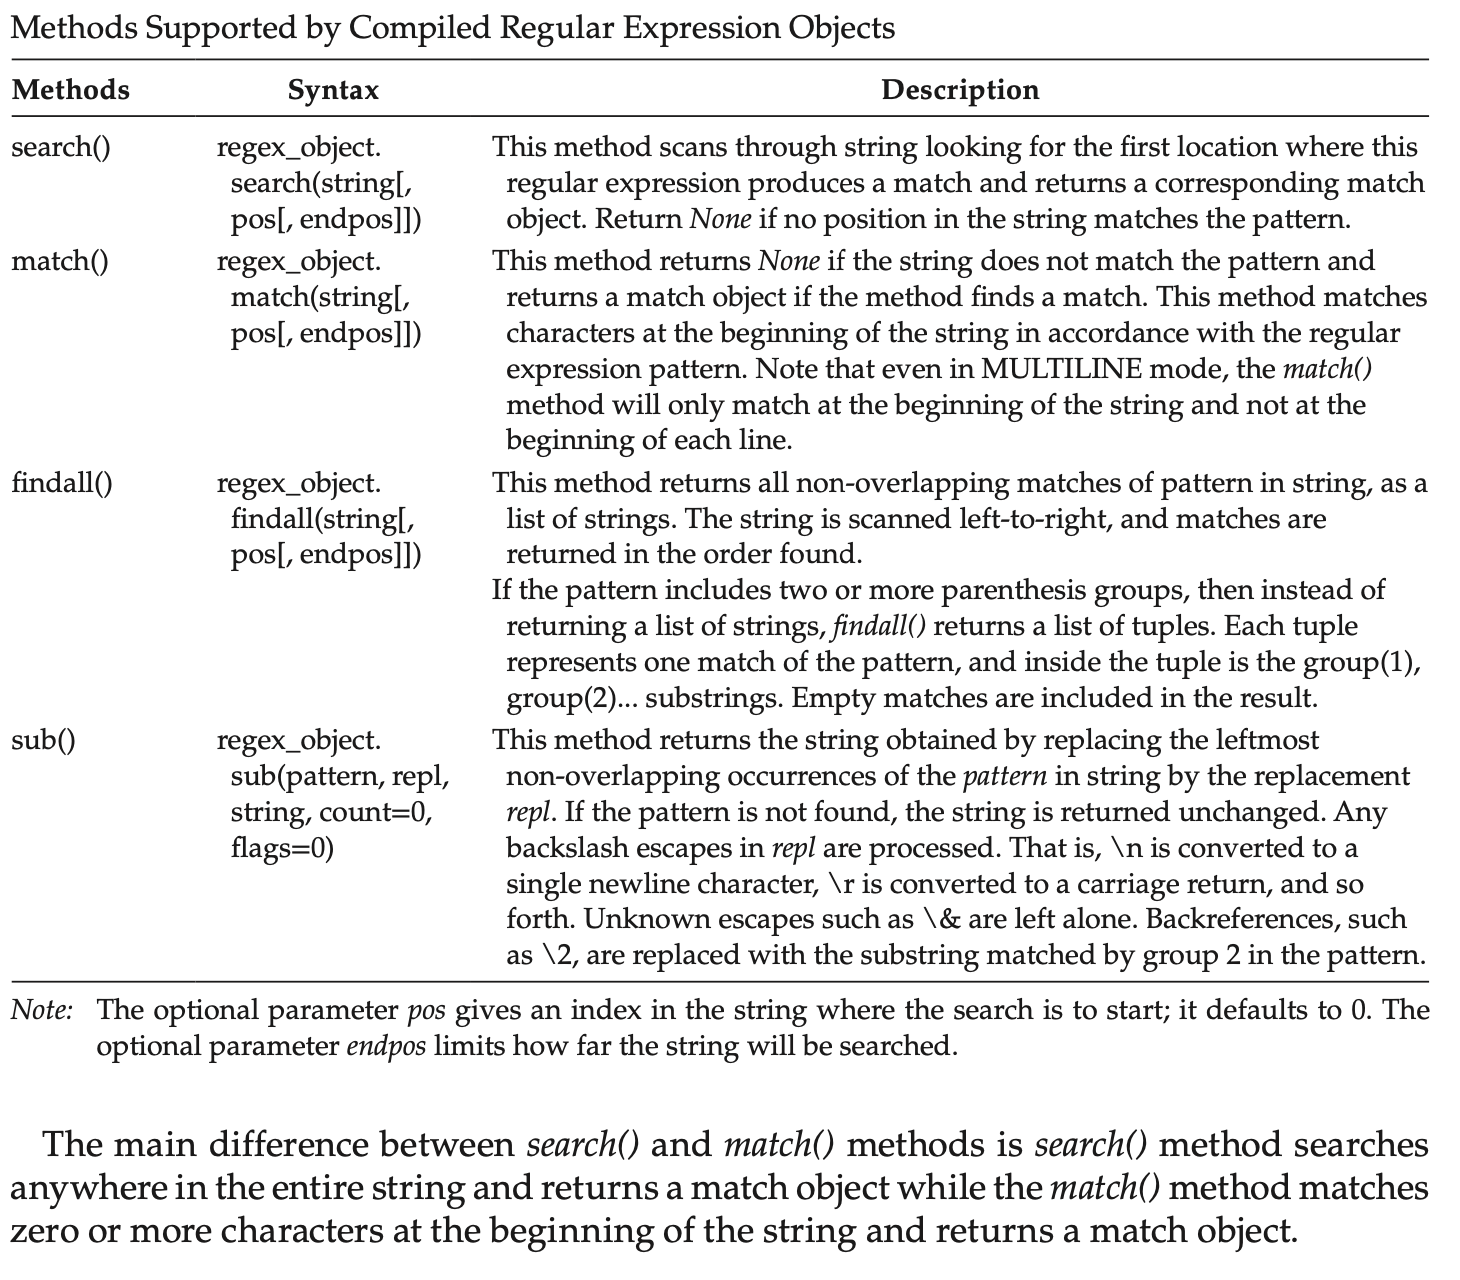

### Search and Match

The presence of a regular expression can be searched in a string using functions like search and match. These functions can be called as per the expression whether it is compiled or not:
* match: looks for the expression at the beginning of the string
* search: looks for the expression everywhere in the string

Each function takes the pos and endpos arguments indicating the beginning and the end position to be searched in the expression. If the expression is found in the given text, a match object(s) is returned. If the match is not found then None is returned. 

In [159]:
import re 
mailid = re.compile(r'[\w.]+@[\w.]+')

Here, 
        
        import re 
        is for importing the re module. 
        
        mailid = re.compile(r'[\w.]+@[\w.]+') 
        is for creating a regular expression called mailid. 
        
Note that it starts with r and the expression is in ‘’. The email ID can have any number of alphanumeric characters followed by a . and then @, which should be followed by any number of alphanumeric characters and (any number of times). After being compiled, it can be used to search the requisite string.

In [160]:
text = 'The site of the university is harsh@jnu.ac.in' 
mailid.search(text)

<re.Match object; span=(30, 45), match='harsh@jnu.ac.in'>

In [161]:
!cat 'file1.txt'

His name is Harsh.
Harsh is walking.
He may be coming.
Harsh 
Haaah 
H12h
H123h 
H@h abc H@abc.com
H@h.com
Hh


In [162]:
# the following code finds the occurrences of the string “Harsh” in the text from the file “file1.txt”

f = open ('file1.txt') 
i = 1
for line in f:
    line.strip()
    print(i)
    if re.search('Harsh',line):
        print(line)
    else:
        print('--')
    i += 1

1
His name is Harsh.

2
Harsh is walking.

3
--
4
Harsh 

5
--
6
--
7
--
8
--
9
--
10
--


In [163]:
# the following code finds the occurrences of the string “Harsh”, 
# at the beginning of the lines in the text from the file “file1.txt”

f = open ('file1.txt') 
i = 1
for line in f:
    line.strip()
    print(i)
    if re.match('Harsh',line):
        print(line)
    else:
        print('--')
    i += 1

1
--
2
Harsh is walking.

3
--
4
Harsh 

5
--
6
--
7
--
8
--
9
--
10
--


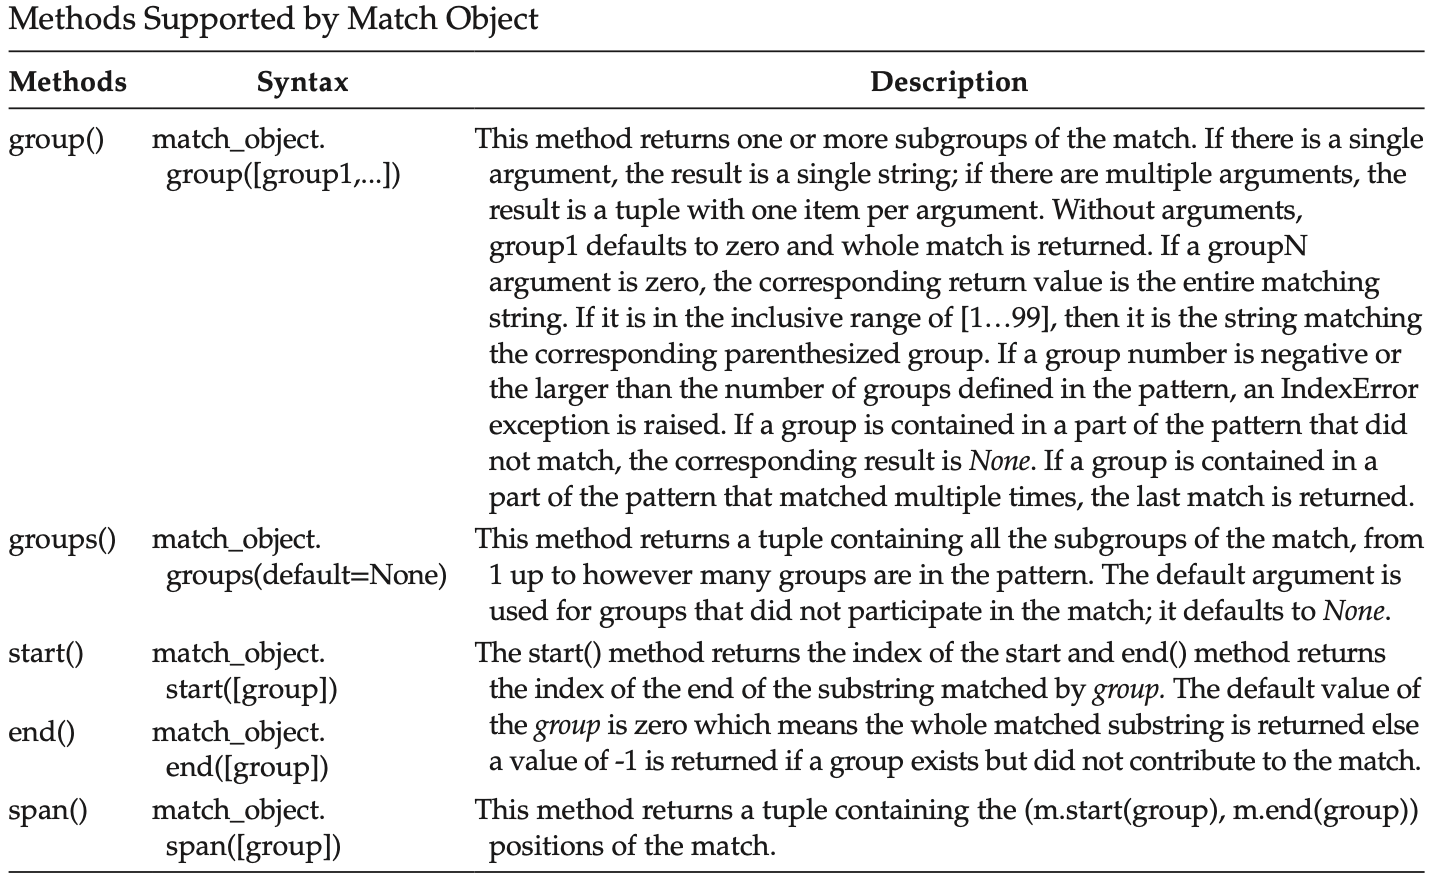

In [164]:
f = open ('file1.txt') 
i = 1
for line in f:
    line.strip()
    if re.match('Harsh',line):
        print(line)
        match_obj = re.match('Harsh',line)
        print(match_obj.start(),match_obj.end(),match_obj.span())
        print('\n')
    i += 1

Harsh is walking.

0 5 (0, 5)


Harsh 

0 5 (0, 5)




In [182]:
import re
pattern = re.compile(r'(a(b)c)d')
pattern.match('abcd')

<re.Match object; span=(0, 4), match='abcd'>

In [183]:
match_obj = pattern.match('abcd')

match_obj.groups(1)

('abc', 'b')

In [173]:
match_obj.group(0), match_obj.group(1), match_obj.group(2)

('abcd', 'abc', 'b')

#### More examples of search

In [175]:
# H...h would match any word that starts with a “H” and ends with a “h”

f = open ('file1.txt') 
for line in f:
    line.strip()
    if re.search('H...h',line):
        print(line)

His name is Harsh.

Harsh is walking.

Harsh 

Haaah 

H123h 



In [176]:
!cat file1.txt

His name is Harsh.
Harsh is walking.
He may be coming.
Harsh 
Haaah 
H12h
H123h 
H@h abc H@abc.com
H@h.com
Hh


In [89]:
# H...h would match any word that starts with a “H” and ends with a “h”

f = open ('file1.txt') 
for line in f:
    line.strip()
    if re.search('H.*h',line):
        print(line)

His name is Harsh.

Harsh is walking.

Harsh 

Haaah 

H12h

H123h 

H@h abc H@abc.com

H@h.com

Hh



In [91]:
# H...h would match any word that starts with a “H” and ends with a “h”

f = open ('file1.txt') 
for line in f:
    line.strip()
    if re.search('H.+h',line):
        print(line)

His name is Harsh.

Harsh is walking.

Harsh 

Haaah 

H12h

H123h 

H@h abc H@abc.com

H@h.com



### Findall

In [92]:
# use of findall to get words which can possibly match email ids from each line

import re
f = open('file1.txt') 
emaillist = []
for line in f:
    found = re.findall('[a-zA-Z0-9]\S*@\S*[a-zA-Z]',line.strip())
    if found:
        emaillist.append(found)

print(emaillist)

[['H@h', 'H@abc.com'], ['H@h.com']]


In [177]:
!cat file1.txt

His name is Harsh.
Harsh is walking.
He may be coming.
Harsh 
Haaah 
H12h
H123h 
H@h abc H@abc.com
H@h.com
Hh


#### Exercise: modify the above regular expression to identify only those lines in the input line where format of email id is <>@<>.com

In [104]:
import re
line = 'H@h abc H@abc.com'
print(line)
print(re.findall('[a-zA-Z0-9]\S*@\S*[a-zA-Z]\.com',line.strip()))

H@h abc H@abc.com
['H@abc.com']


#### Exercise: modify the above regular expression to identify only those lines in the input line where format of email id is <>@<>.<>

In [106]:
import re
line = 'H@h abc H@abc.com H@h.in'
print(line)
print(re.findall('[a-zA-Z0-9]\S*@\S*[a-zA-Z]\.\S+',line.strip()))

H@h abc H@abc.com H@h.in
['H@abc.com', 'H@h.in']


### Sub

In [178]:
# use of sub to identify a pattern and replace by another

import re
pattern = re.compile(r',')
replaced_string = pattern.sub('$d', 'this, is, a, test')
replaced_string

'this$d is$d a$d test'

In [109]:
# input string remains unchanged if replacement pattern is not found

import re
pattern = re.compile(r'\|')
replaced_string = pattern.sub('$', 'this, is, a, test')
replaced_string

'this, is, a, test'

## Summary

* The term “regular expressions” is also called regexes or regex patterns.
* A single regex can represent multiple number of strings which meet it's criteria.
* Regex provides a powerful way to search and manipulate strings.
* Python comes with module 're' to work with regular expressions.
* Regular expressions should be compiled using compile() method in 're' module to match objects.
* Various methods like search(), match(), findall() and sub() are used to extract substrings matching a pattern.

References: 
* https://cheatography.com/mutanclan/cheat-sheets/python-regular-expression-regex/
* https://www.tutorialspoint.com/python/python_reg_expressions.htm

## Sample Python Code

### Example 1

In [180]:
'''
Given an input file which contains a list of names and phone numbers separated by spaces in the following format:

Alex 80-23425525
Emily 322-56775342
Grace 20-24564555
Anna 194-49611659
Phone number contains a 3- or 2-digit area code and a hyphen followed by an 8-digit number.

Find all names having phone numbers with a 3-digit area code using regular expressions.
'''

import re 

def main():
    pattern = re.compile(r"(\w+)\s+\d{3}-\d{8}")
    with open("person_details.txt", "r") as file_handler:
        print("Names having phone numbers with 3 digit area code") 
        for each_line in file_handler:
            match_object = pattern.search(each_line) 
            if match_object:
                print(each_line)
                print(match_object.group(1)) 
    
if __name__ == "__main__":
    main()

Names having phone numbers with 3 digit area code
Emily 322-56775342

Emily
Anna 194-49611659
Anna


### Example 2

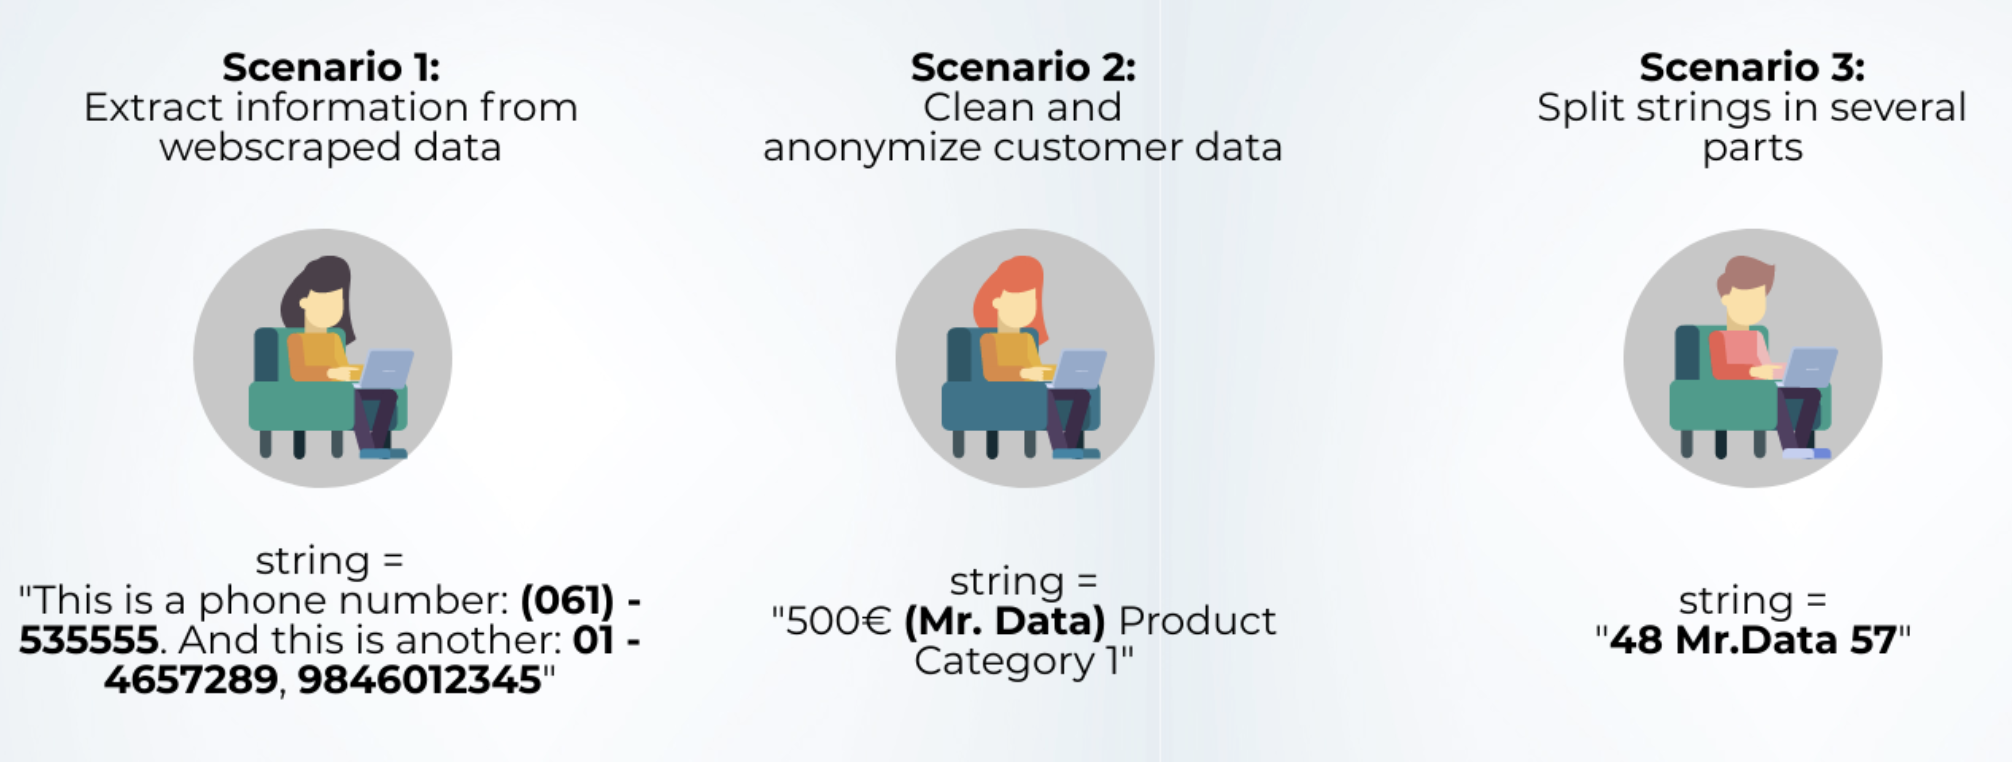

#### Scenario 1

In [126]:
# extract phone numbers

import re
line = "This is a phone number: (061) - 535555. And this is another: 01-4657289, 9846012345"

line

'This is a phone number: (061) — 535555. And this is another: 01–4657289, 9846012345'

In [114]:
print(re.findall('\d', line))

['0', '6', '1', '5', '3', '5', '5', '5', '5', '0', '1', '4', '6', '5', '7', '2', '8', '9', '9', '8', '4', '6', '0', '1', '2', '3', '4', '5']


In [149]:
print(re.findall("\d+", line)) #exercise: retain () and - in phone numbers

['061', '535555', '01', '4657289', '9846012345']


#### Scenario 2

In [151]:
# remove data within circular brackets

line = '500€ (Mr. Data) Product Category 1'
print(re.findall(r"\([a-zA-Z .]*\)", line))

['(Mr. Data)']


In [152]:
print(re.sub(r"\([a-zA-Z .]*\)", "-XY-", line))

500€ -XY- Product Category 1


#### Scenario 3

In [153]:
# use of split() in re

line = '48 Mr.Data 57'
print(re.split(" ", line))

['48', 'Mr.Data', '57']


## Multiple Choice Questions and Programming

Refer attached documents
* MCQs 
* Theory and programming questions